## Support Vector Machines

SVM will try to divide your data into 2 using a hyperplane in n-dimensional space. It tries to separate the data by making the margin between two as wide as possible. That's the reason it's also called Large Margin Classifier. 

Some of SVM hyperparameters are:
1. C : C is the penalty term that makes the decision boundary smoother/wiggly. This is a trade-off between making the model more stable vs more accurate. A smaller value will make the boundary smoother while a high C value will try to classify all the examples correctly and lead to non-smooth curves. 

2. gamma : gamma value indicates the influence of single variable. A small gamma value indicates that a variable has influence over long distances. That is, it will play a role in deciding the class of another point even if that another point is far away from the current point. Inversely, large gamma value will indicate lower influence. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [14]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)


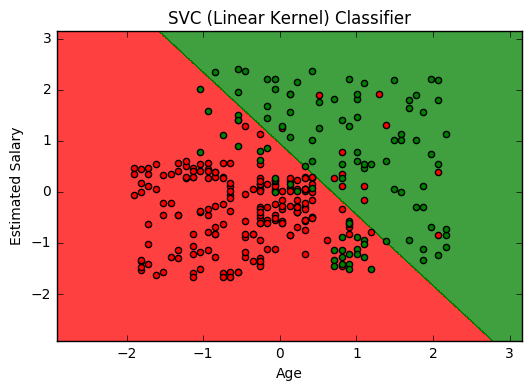

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Linear Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  1],
       [17, 24]])

In [20]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)


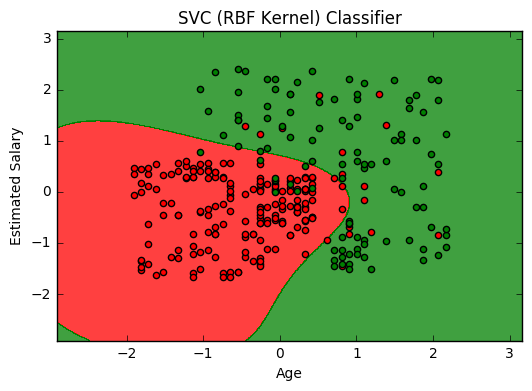

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (RBF Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  4],
       [ 3, 38]])

In [25]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='poly', random_state=0).fit(X_train, y_train)


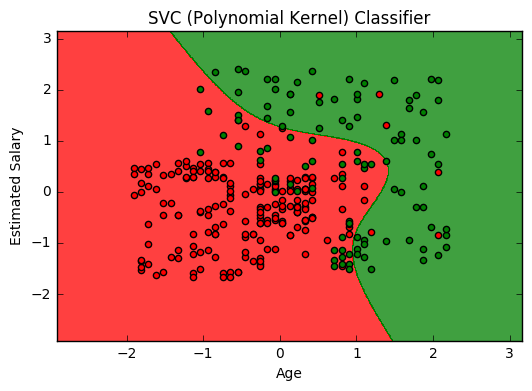

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  1],
       [14, 27]])

## Kernel method

The data is sometimes not linearly separable (like the case above) so the kernel trick is to map this space into higher dimension, where they are linearly separable. Then mapping the classification back into the original space gives non-linear classifier

This mapping function that maps lower dimensional data to higher is called as the kernel.

### Problem
The problem with converting lower to higher dimension and then back to lower is computationally intensive. To deal with it we use something called as "Kernel Trick"

### Radial Basis Function (Gaussian Function) and Kernel Trick
RBF function maps data from lower to higher dimension by using landmarks which are the centre point of the bell curve. The points far from the landmark get a value of 0 and the ones close to it git high values. That's the reason it separates the data in higher dimension without actally mapping the points in higher dimension. This data which is linearly separable in higher dimension, which when mapped to lower dimension, gives rise to non linear models.  

RBF function is not the only kernel function, there are many more
1. Sigmoid Kernel
2. Polynomial Kernel